# Consignes

On ne peut se déplacer que d'une commune à une commune adjacente.

Obtenir un programme qui prend en paramètre deux noms de communes quelconques en France et :
- renvoie le plus court chemin entre les deux,
- affiche sur une carte le trajet utilisé.

L'expression «le plus court chemin» désigne, au choix et par ordre de difficulté :
- (A) : le plus court chemin en nombre de communes traversées,
- (B) : le plus court chemin en distance kilométrique.

Vous commencerez par implémenter le cas (A) puis - si vous en avez le temps - le cas (B).
    
### *Conseils :*  
Commencez par construire une bibliothèque de fonctions vous permettant de manipuler basiquement les données, par exemple :
- à partir d'un nom de commune, récupérer son code insee,
- à partir d'un code insee de commune, récupérer son indice dans le tableau des communes,
- à partir de deux codes de communes adjacentes, récupérer la distance entre les deux,
- etc.

### *Choix à effectuer :*  
Utiliserez-vous une classe Graphe comme en cours ou pas ?

### Structures de données utilisées

On utilisera la structure de données `communes` ci-dessous qui est une liste de dictionnaires répertoriant les communes de France métropolitaine (hors Corse).

In [1]:
import json

def charger_fichier_json( nom_fic ):
    """
    Permet de lire un fichier json : retourne une structure 
    de données correspondant au contenu du json.
    """
    with open(nom_fic, 'r', encoding = 'utf-8') as json_file:
         sdd = json.load(json_file)
    return sdd
    

In [2]:
communes = charger_fichier_json('fusion_communes_tp.json')
com_insee = {com["nom_complet"]:com['insee'] for com in communes} #genere un dictionnaire avec clé = nom de la commune; valeur: insee de la commune
insee_com = {com["insee"]:com['nom_complet'] for com in communes}
insee_ind = {communes[i]['insee']:i for i in range(len(communes))} #genere un dictionnaire avec clé: insee; valeur: indice dans tab




In [3]:
def existe_voisin(insee1, insee2):
    indice_tab_1 = insee_ind[insee1]
    return insee2 in communes[indice_tab_1]['voisins']

def distance_entre_deux_voisins(insee1, insee2):
    if existe_voisin(insee1, insee2):
        indice_tab_1 = insee_ind[insee1]
        return communes[indice_tab_1]['voisins'][insee2]['distance']

In [4]:
distance_entre_deux_voisins('01136', '01203')

3.337

In [5]:
com_insee["Mer"]

'41136'

In [6]:
insee_ind['41136']

15487

In [7]:
communes[119]['voisins']
for key in communes[119]['voisins'].keys():
    print(key)

01203
01334
01188
01167
01042
01123
01179


Sur l'exemple ci-dessous (dictionnaire d'indice 119 de la liste), la commune est Cruzilles-lès-Mépillat, dans le département 01 (Ain). Cette commune a pour code insee 01136 (identifiant unique) et a pour voisines les communes d'identifiants insee 01203 (située à 3,337 km à vol d'oiseau), 01334 (située à 3,033 km à vol d'oiseau), 01188 (située à 4,062 km à vol d'oiseau) etc.

Enfin, la latitude de Cruzilles-lès-Mépillat est 46,222°N et sa longitude 4,875°E (ce qui est utile pour pouvoir la positionner sur une carte).

In [8]:
print(communes[16445])
print('------------------------------------')
print(communes[15487])
print('------------------------------------')
print(communes[insee_ind['41292']])

{'insee': '45028', 'region': '24', 'departement': '45', 'nom_majuscule': 'BEAUGENCY', 'nom_minuscule': 'Beaugency', 'nom_complet': 'Beaugency', 'voisins': {'45024': {'cap': 31, 'distance': 4.208}, '45179': {'cap': 122, 'distance': 6.611}, '41220': {'cap': 188, 'distance': 7.752}, '45317': {'cap': 244, 'distance': 3.817}, '45344': {'cap': 307, 'distance': 4.067}, '45202': {'cap': 355, 'distance': 3.401}}, 'latitude': 47.7781494309, 'longitude': 1.63946818857}
------------------------------------
{'insee': '41136', 'region': '24', 'departement': '41', 'nom_majuscule': 'MER', 'nom_minuscule': 'Mer', 'nom_complet': 'Mer', 'voisins': {'41245': {'cap': 3, 'distance': 4.83}, '41008': {'cap': 70, 'distance': 4.033}, '41066': {'cap': 129, 'distance': 3.064}, '41252': {'cap': 227, 'distance': 5.138}, '41039': {'cap': 288, 'distance': 7.226}, '41292': {'cap': 306, 'distance': 5.363}}, 'latitude': 47.7134200176, 'longitude': 1.50398022578}
------------------------------------
{'insee': '41292', 'r

In [9]:
communes_dic = {(ville['insee'], ville['nom_complet'] for ville in communes}
communes_dic

  File "<input>", line 1
    communes_dic = {(ville['insee'], ville['nom_complet'] for ville in communes}
                                                          ^
SyntaxError: invalid syntax


# Fonctions permettant d'utiliser facilement folium

In [10]:
import folium

def generer_popup(html):
    iframe = folium.IFrame(html=html, width = 300, height = 100)
    popup = folium.Popup(iframe, max_width = 500)
    return popup

def placer_marqueur(point, html, carte): #point : tuple (lat, lon)
    folium.CircleMarker(
        radius = 2,
        location = point,
        popup = generer_popup(html),
        color = 'red',
        ).add_to(carte)

def tracer_segment(point1, point2, html, carte):
    folium.PolyLine(
        [point1, point2],
        color = 'blue',
        weight = 1,
        opacity = 1).add_to(carte)
    
    folium.CircleMarker( 
        radius = 1,
        location = ((point1[0]+point2[0])/2, (point1[1]+point2[1])/2),
        popup = generer_popup(html),
        color = 'blue').add_to(carte)   

# Exemple d'utilisation de folium : tracé du segment Messas - Villorceau

In [11]:
#on récupère les données de Messas
for com in communes:
    if com['nom_complet'] == 'Messas':
        com1 = com
        break

#on récupère les données de Villorceau
for com in communes:
    if com['nom_complet'] == 'Villorceau':
        com2 = com
        break

#les deux communes sont adjacentes : on peut récupérer la distance entre les deux
insee_1 = com1['insee']
distance = com2['voisins'][insee_1]['distance']


#pour ajouter des points ou des segments il suffit des coordonnées (latitude et longitude)
#des points correspondant. On rajoute alors du HTML qui s'affichera dans la poppup
#et on précise bien le nom de la carte sur laquelle on effectue l'ajout
ma_carte = folium.Map(location=(47.8, 1.6), zoom_start=12)

placer_marqueur( (float(com1['latitude']), float(com1['longitude'])),
                'Ici du code <br> HTML',
                 ma_carte)

placer_marqueur( (float(com2['latitude']), float(com2['longitude'])),
                 'Il serait plus <br> intelligent <br> d\'afficher des infos <br> concernant la commune.',
                 ma_carte)

tracer_segment( (float(com1['latitude']), float(com1['longitude'])),
                (float(com2['latitude']), float(com2['longitude'])),
                'distance entre les deux : ' + str(distance),
                ma_carte
              )

ma_carte

# Classes Pile et File 

In [12]:
class Cellule:
    
    def __init__(self, element, succ):
        self.element = element
        self.succ = succ
        
    def get_element(self):
        return self.element
    
    def get_succ(self):
        return self.succ

    def set_succ(self, cell):
        self.succ = cell
        
    def __repr__(self):
        return '|' + str(self.element)
    
class Pile:
    
    def __init__(self):
        self.cellule = None
        
    def est_vide(self):
        return self.cellule == None
        
    def empiler(self, element):
        self.cellule = Cellule(element, self.cellule)
    
    def depiler(self):
        assert not self.est_vide()
        x = self.cellule.get_element()
        self.cellule = self.cellule.get_succ()
        return x
        
    def __repr__(self):
        c = self.cellule
        s = '|'
        while not c is None:
            s = c.__repr__() + s
            c = c.get_succ()
        return s[:]  

class File:
    '''Classe implémentant une structure de file grâce à deux piles'''
    
    def __init__(self):
        self._entree = Pile()
        self._sortie = Pile()
    
    def _transfert(self):
        while not self._entree.est_vide():
            self._sortie.empiler(self._entree.depiler())
        
    def enfiler(self, element):
        self._entree.empiler(element)
    
    def defiler(self):
        assert not self.est_vide()
        if self._sortie.est_vide():
            self._transfert()
        return self._sortie.depiler()
    
    def est_vide(self):
        return self._entree.est_vide() and self._sortie.est_vide()
    
    def __repr__(self):
        return "Votre pile est : " + str(self._entree) + " et votre défausse est : " + str(self._sortie)

# Plus petit nombre de communes traversées

In [25]:
from vizu_graphe import VizuGraphe

class Graphe:
    '''Graphe orienté représenté par un dictionnaire d'adjacence'''
    
    def __init__(self):
        self._dic = dict()
        
    def ajouter_sommet(self, s):
        if s not in self._dic:
            self._dic[s] = []
    
    def ajouter_arc(self, s1, s2):
        self.ajouter_sommet(s1)
        self.ajouter_sommet(s2)
        self._dic[s1].append(s2)
    
    def existe_arc(self, s1, s2):
        return s2 in self._dic[s1]
    
    def voisins(self, s):
        return self._dic[s]

    def sommets(self):
        return [keys for keys in self._dic.keys()]
    
    def schema(self):
        VizuGraphe('liste', self._dic, oriente = True)
       
    def supprimer_sommet(self, s):
        del self._dic[s]
        for sommet in self.sommets():
            if self.existe_arc(sommet, s):
                self._dic[sommet].remove(s)
    
            

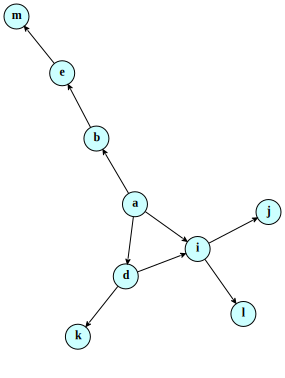

In [26]:
ng = Graphe()
ng.ajouter_arc('a', 'b')
ng.ajouter_arc('a', 'd')
ng.ajouter_arc('b', 'e')
ng.ajouter_arc('a', 'i')
ng.ajouter_arc('d', 'i')
ng.ajouter_arc('i', 'j')
ng.ajouter_arc('d', 'k')
ng.ajouter_arc('i', 'l')
ng.ajouter_arc('e', 'm')
ng.schema()

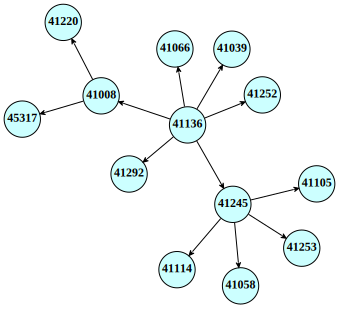

['41136', '41245', '41008', '41066', '41252', '41039', '41292', '41105', '41114', '41253', '41058', '45317', '41220']

In [27]:
def generer_graphe(com1, com2):
    insee1 = com_insee[com1]
    insee2 = com_insee[com2]
    commune_actuelle = insee1
    communes_visites = [insee1]
    graphe_communes = Graphe()
    graphe_communes.ajouter_sommet(insee1)
    en_attente = File()
    c=0
    
    for key in communes[insee_ind[insee1]]['voisins'].keys():
        en_attente.enfiler(key)
        graphe_communes.ajouter_arc(commune_actuelle, key)
        communes_visites.append(key)
        if key == insee2:
            break
            
    while not en_attente.est_vide():
        if c== 15000000:
            print('distance trop élevée')
        commune_actuelle = en_attente.defiler()
        for key in communes[insee_ind[commune_actuelle]]['voisins'].keys():
            if not key in communes_visites:
                en_attente.enfiler(key)
                graphe_communes.ajouter_arc(commune_actuelle, key)
                communes_visites.append(key)
                if key == insee2:
                    return graphe_communes
        c+=1
        
    
g = generer_graphe("Mer", "Saint-Laurent-Nouan")
g.schema()
g.sommets()

In [28]:
def supp_en_trop(g, depart, arrive):
    liste = [sommet for sommet in g.sommets() if g.voisins(sommet) == []]
    for s in liste:
        if s != arrive:
            g.supprimer_sommet(s)
        
def itineraire_v2(depart, arrive):
    c = 0
    g = generer_graphe(depart, arrive)
    depart = com_insee[depart]
    arrive = com_insee[arrive]
    while len(g.voisins(depart)) > 1:
        if c == 200000:
            return g.schema()
        supp_en_trop(g,depart,arrive)
        c+=1
    file = File()
    en_attente = [depart]
    sommet_actuel = None
    c = 0
    while en_attente != []:
        if c == 10000:
            return "ecart trop grand"
        sommet_actuel = en_attente.pop()
        file.enfiler(sommet_actuel)
        if sommet_actuel == arrive:
            return gen_carte(file)
        for voisin in g.voisins(sommet_actuel):
                en_attente.append(voisin)
        c+=1
        
def gen_carte(file):
    if file.est_vide():
        return 'La file est vide!'
    insee_actuel = file.defiler()
    com1 = communes[insee_ind[insee_actuel]]
    carte = folium.Map(location=(com1['latitude'], com1['longitude'] ), zoom_start=10)
    placer_marqueur( (float(com1['latitude']), float(com1['longitude'])), ('<h1>' + com1['nom_complet'] +'</h1> <p>' + str(com1) + '</p>'), carte)
    
    c = 0
    while not file.est_vide():
        if c == 200000:
            return 'trop grand'
        insee_suiv = file.defiler()
        com2 = communes[insee_ind[insee_suiv]]
        placer_marqueur( (float(com2['latitude']), float(com2['longitude'])), ('<h1>' + com2['nom_complet'] +'</h1>'), carte)
        tracer_segment( (float(com1['latitude']), float(com1['longitude'])), 
                       (float(com2['latitude']), float(com2['longitude'])),
                         'distance entre les deux : ' + str(com1['voisins'][insee_suiv]['distance']) + 'km',
                      carte)
        insee_actuel = insee_suiv
        com1 = communes[insee_ind[insee_actuel]]
        c+=1
    return carte
        
        

    

In [29]:
itineraire_v2("Tours", 'Mer')

In [44]:
def visiter(g, couleurs, distances, voisin, sommet): #modif
    couleurs[voisin] = 'GRIS'
    distances[voisin] = distances[sommet] + 1 #modif
    
def parcours_iteratif_2_distances(g, couleurs, distances, sommet): #modif
    en_attente = File()
    en_attente.enfiler(sommet)
    visiter(g, couleurs, distances, sommet, sommet) #modif
    while not en_attente.est_vide():
        sommet = en_attente.defiler()
        for v in g.voisins(sommet):
            if couleurs[v] != 'GRIS':
                en_attente.enfiler(v)
                visiter(g, couleurs, distances, v, sommet) #modif
                
couleurs = {s:'BLANC' for s in g.sommets()}
distances = {s:-1 for s in g.sommets()}
parcours_iteratif_2_distances(g, couleurs, distances, '41136') #modif
distances

{'41136': 0, '41245': 1, '41008': 1, '41066': 1, '41252': 1, '41039': 1, '41292': 1, '41105': 2, '41114': 2, '41253': 2, '41058': 2, '45317': 2, '41220': 2}

# Plus courte distance

# Plus courte distance Dijkstra